In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# Directory where your images are stored
image_dir = os.path.join('data', 'opt')

# Load and preprocess the images
def load_images(image_dir, img_size=(128, 128)):
    images = []
    for img_file in os.listdir(image_dir)[:100]:
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, img_size)  # Resize all images to a fixed size
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    images = np.array(images)
    return images

# Load your images and reshape for the model
image_size = (128, 128)  # Change this according to your image resolution
x_train = load_images(image_dir, img_size=image_size)
x_train = np.reshape(x_train, (x_train.shape[0], image_size[0], image_size[1], 1))

# Adding noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

In [4]:
input_img = layers.Input(shape=(image_size[0], image_size[1], 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.6929
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.6918
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6865
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.6823
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.6743
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.6693
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.6698
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.6673
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6600
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6627
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6581
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.6607
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.6551
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.6557
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.6590
Epoch 16/50
4/4 ━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


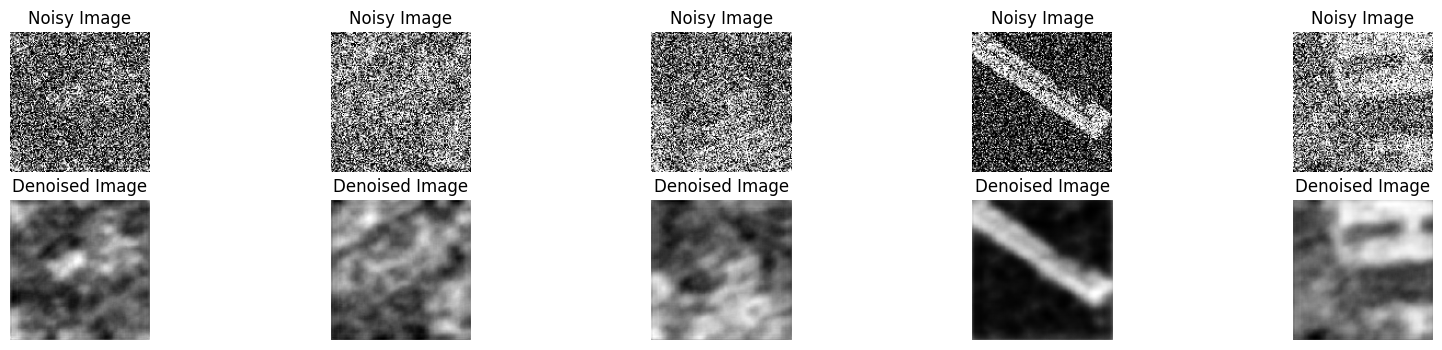

In [6]:
# Denoise the images
denoised_images = autoencoder.predict(x_train_noisy)

# Visualize a few noisy vs denoised images
n = 5  # Display first 5 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')
    
    # Display denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')
plt.show()

In [7]:
# Input remains the same grayscale image
input_img = layers.Input(shape=(image_size[0], image_size[1], 1))  # Grayscale input

# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

# Output 3 channels (RGB)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Predict RGB

autoencoder_color = models.Model(input_img, decoded)
autoencoder_color.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Load grayscale images (SAR) and corresponding RGB images (optical) from the dataset
def load_rgb_images(image_dir, img_size=(128, 128)):
    images = []
    for img_file in os.listdir(image_dir)[:100]:
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)  # Load the image in RGB format
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
    images = np.array(images)
    return images

# Assuming x_train_noisy is your noisy grayscale input
# Load corresponding RGB optical images for training
x_train_rgb = load_rgb_images(os.path.join('data', 'opt'), img_size=image_size)

In [9]:
# Train the colorization autoencoder on noisy grayscale images and their RGB counterparts
autoencoder_color.fit(x_train_noisy, x_train_rgb, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - loss: 0.0255
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - loss: 0.0239
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - loss: 0.0257
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - loss: 0.0228
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - loss: 0.0224
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - loss: 0.0193
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - loss: 0.0186
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - loss: 0.0226
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - loss: 0.0230
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - loss: 0.0218
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - loss: 0.0194
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - loss: 0.0186
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - loss: 0.0167
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - loss: 0.0148
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - loss: 0.0120
Epoch 16/50
4/4 ━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


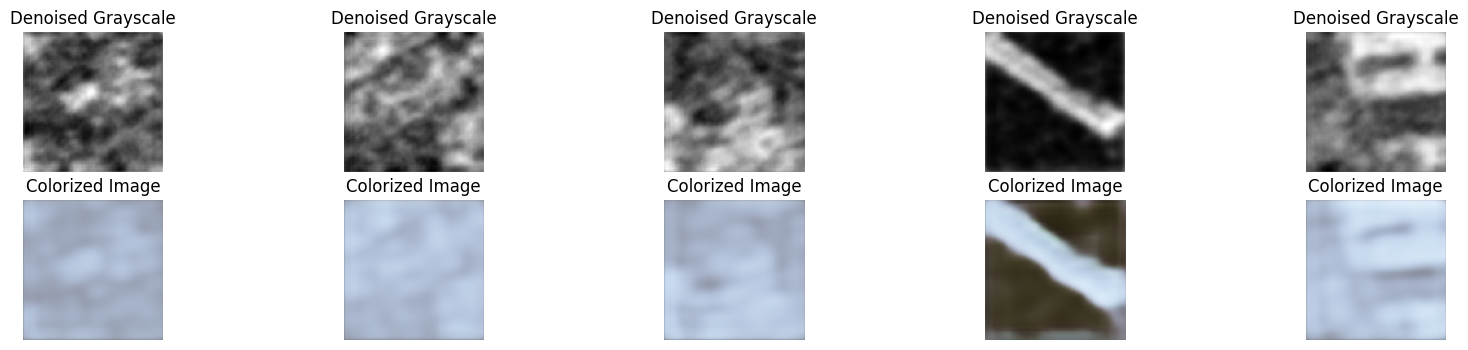

In [10]:
# Predict the colorized images
colorized_images = autoencoder_color.predict(denoised_images)

# Visualize the colorized images
n = 5  # Display first 5 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display grayscale denoised images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(denoised_images[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title("Denoised Grayscale")
    plt.axis('off')

    # Display the colorized images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(colorized_images[i])
    plt.title("Colorized Image")
    plt.axis('off')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04947617..1.0002246].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2293989..1.0130951].


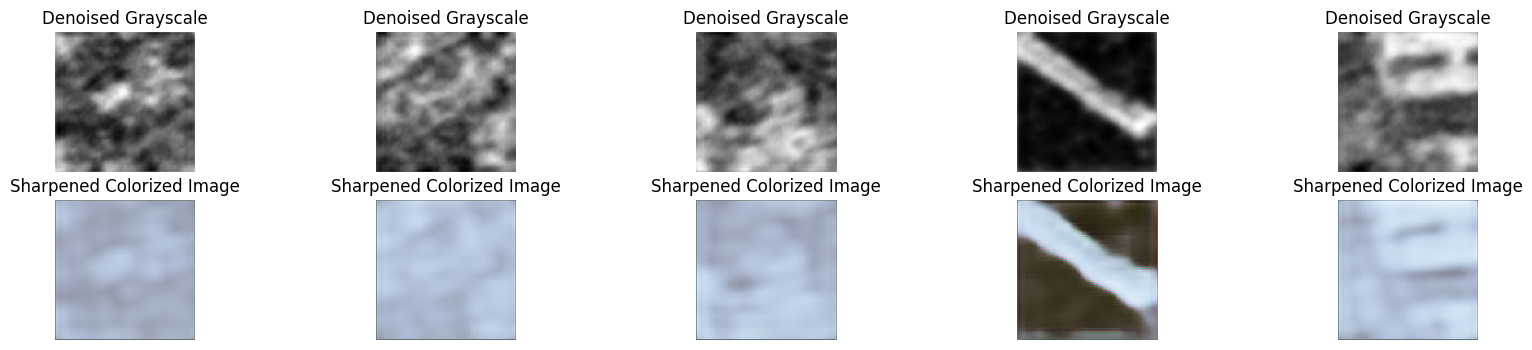

In [11]:
# Predict the colorized images
colorized_images = autoencoder_color.predict(denoised_images)

# Optional: Apply a super-resolution network to enhance image quality
# Use a pre-trained SRGAN model or similar if available
# colorized_images_high_res = super_resolution_model.predict(colorized_images)

# Visualize the colorized images with higher resolution
n = 5  # Display first 5 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display grayscale denoised images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(denoised_images[i].reshape(image_size[0], image_size[1]), cmap='gray')
    plt.title("Denoised Grayscale")
    plt.axis('off')

    # Display the enhanced colorized images (apply sharpening)
    colorized_img = colorized_images[i]
    
    # Optionally, apply a sharpening filter (unsharp mask or laplacian)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(colorized_img, -1, kernel)

    # Display the sharpened colorized image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sharpened_image)
    plt.title("Sharpened Colorized Image")
    plt.axis('off')
plt.show()

In [12]:
autoencoder_color.save('colorized.keras')